In [1]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import glob
import time
import pandas as pd
from statistics import mean

# plt.rcParams["figure.figsize"] = (3,3)
print (time.ctime())

Tue Jan 12 22:38:48 2021


In [14]:
# file1 = "/home/imaginglab/Data/TPX3/CHIP0/Test/8x8Grid_visEq_1s_W0028_F03-200228-095644-1.csv"
file1 ="/QuantumRouter/Data/AOD12152020/AOD_10s_500nsGW_2usPW_delay_data/AOD_10s_500nsGW_2usPW_delay0us_W0028_H07-201216-121639-1.csv"
print (file1, time.ctime())

# data1=np.loadtxt(file1, dtype= float, delimiter=",", usecols = (0,1,2,3,4))
# data1 = np.genfromtxt(file1, delimiter=",", skip_header=True)[:, 1:]
data1 = pd.read_csv(file1)
print(pd.read_csv(file1, nrows=5))
print(time.ctime())

# # file2 = "/home/imaginglab/Data/TPX3/CHIP0/Test/8x8Grid_SettingsEq_1s_W0028_F03-200228-100050-1.csv"
# file2 = "/QuantumRouter/AOD11172020/AOD_10s_16dBm_blnkext_FGen_W0028_H07-201117-114358-1_cent.csv"
# print (file2, time.ctime())

# # data2=np.loadtxt(file2, dtype= float, delimiter=",", usecols = (0,1,2,3,4))
# # data2 = np.genfromtxt(file2, delimiter=",", skip_header=True)[:, 1:]
# data2 =pd.read_csv(file2)
# print(pd.read_csv(file2, nrows=5))
# print(time.ctime())

/QuantumRouter/Data/AOD12152020/AOD_10s_500nsGW_2usPW_delay_data/AOD_10s_500nsGW_2usPW_delay0us_W0028_H07-201216-121639-1.csv Tue Jan  5 22:35:54 2021
   #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
0   237    20  157513766656       4575            4575         NaN
1   237    21  157513766656       4625            4625         NaN
2   237    22  157513766656       4675            4675         NaN
3   236    20  157513766656       4650            4650         NaN
4   236    21  157513766656       4650            4650         NaN
Tue Jan  5 22:36:37 2021


In [15]:
data1.shape

(124250758, 6)

In [16]:
GridX1min = 118
GridX1max = 161
GridY1min = 108
GridY1max = 151

# GridX1min = 115
# GridX1max = 160
# GridY1min = 105
# GridY1max = 150

# GridX2min = 118
# GridX2max = 161
# GridY2min = 108
# GridY2max = 151

In [17]:
# ToAmin = data1["#ToA"].min()
# ToAmax = ((data1["#ToA"].min())+(1000000*4096./25.))
# data1_toaslice = data1.drop(data1[(data1['#ToA'] < ToAmin) | (data1['#ToA'] > ToAmax)].index)

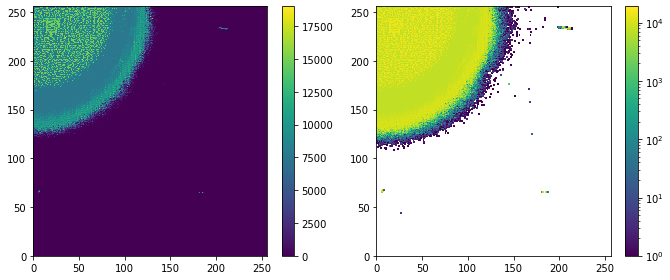

In [18]:
#File 1 grid
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(data1['#Row'], data1['#Col'], bins = 256, range = [(0, 256), (0, 256)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(data1['#Row'], data1['#Col'], bins = 256, range = [(0, 256), (0, 256)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)
fig.tight_layout()
plt.show()

Text(0.5, 1.0, 'Grid')

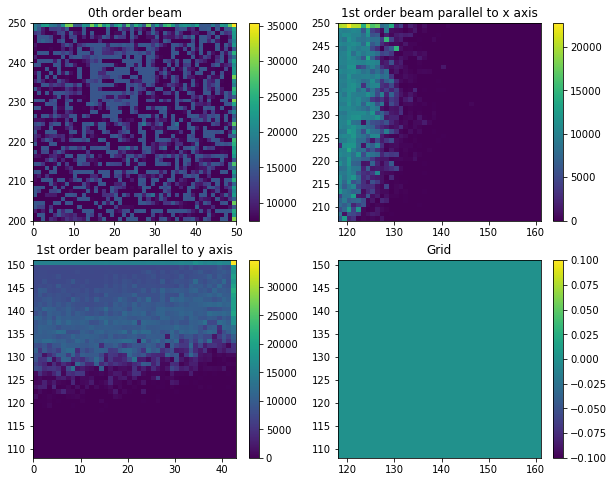

In [19]:
#Display 1th order bottom spot

fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(10, 8))

h1 = ax1.hist2d(data1['#Row'], data1['#Col'], bins = 50, range = [(0, 50), (200, 250)])
fig.colorbar(h1[3], ax = ax1)
ax1.set_title('0th order beam')

h2 = ax2.hist2d(data1['#Row'], data1['#Col'], bins = 43, range = [(GridX1min, GridX1max), (207,250)])
fig.colorbar(h2[3], ax = ax2)
ax2.set_title('1st order beam parallel to x axis')

h3 = ax3.hist2d(data1['#Row'], data1['#Col'], bins = 43, range = [(0, 43), (GridY1min, GridY1max)])
fig.colorbar(h3[3], ax = ax3)
ax3.set_title('1st order beam parallel to y axis')

h4 = ax4.hist2d(data1['#Row'], data1['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)])
fig.colorbar(h4[3], ax = ax4)
ax4.set_title('Grid')


In [9]:
def min_max(data, grid_x_min, grid_x_max, grid_y_min, grid_y_max):
    """Returns DataFrame filtering values less than min or greater than max for two columns"""
    x_cond = (data['#Row'] <grid_x_min) | (data['#Row'] > grid_x_max)
    y_cond = (data['#Col'] < grid_y_min) | (data['#Col'] > grid_y_max)
    new_data = data.drop(data[x_cond | y_cond].index)
    return new_data



In [ ]:
grid1_df = min_max(data1, GridX1min, GridX1max, GridY1min, GridY1max)

print(grid1_df.shape, type(grid1_df.iloc[0,0]), type(grid1_df.iloc[1,1]), time.ctime())
print(grid1_df.iloc[:3])

# grid2_df = min_max(data2, GridX2min, GridX2max, GridY2min, GridY2max)

# print(grid2_df.shape, type(grid2_df.iloc[0,0]), type(grid2_df.iloc[1,1]), time.ctime())
# print(grid2_df.iloc[:3])

In [20]:
oth_df = min_max(data1, 0, 50, 200, 250)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(oth_df.shape, type(oth_df.iloc[0,0]), type(oth_df.iloc[1,1]), time.ctime())
print(oth_df.iloc[:3])

(27857282, 6) <class 'numpy.int64'> <class 'numpy.int64'> Tue Jan  5 22:40:25 2021
   #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
0   237    20  157513766656       4575            4575         NaN
1   237    21  157513766656       4625            4625         NaN
2   237    22  157513766656       4675            4675         NaN


In [21]:
Y_df = min_max(data1, 0, 43, GridY1min, GridY1max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Y_df.shape, type(Y_df.iloc[0,0]), type(Y_df.iloc[1,1]), time.ctime())
print(Y_df.iloc[:3])

(9093708, 6) <class 'numpy.int64'> <class 'numpy.int64'> Tue Jan  5 22:41:08 2021
      #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
9143   151    13  157514167040         50              50         NaN
9252   151    17  157514185984       4400            4400         NaN
9319   151     4  157514196224       3850            3850         NaN


In [22]:
X_df = min_max(data1, GridX1min, GridX1max, 207,250)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(X_df.shape, type(X_df.iloc[0,0]), type(X_df.iloc[1,1]), time.ctime())
print(X_df.iloc[:3])

(3693864, 6) <class 'numpy.int64'> <class 'numpy.int64'> Tue Jan  5 22:42:01 2021
       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
10360   240   118  157514284544         25              25         NaN
10534   250   119  157514296064        100             100         NaN
10547   234   118  157514296320         25              25         NaN


In [23]:
# GRIDToTavg = grid1_df['#ToT[arb]'].to_numpy().mean()
_0thToTavg = oth_df['#ToT[arb]'].to_numpy().mean()
YToTavg = Y_df['#ToT[arb]'].to_numpy().mean()
XToTavg = X_df['#ToT[arb]'].to_numpy().mean()
# print("GRIDToTavg:", GRIDToTavg)
print("0thToTavg:", _0thToTavg)
print("XToTavg:", XToTavg)
print("YToTavg:", YToTavg)

# print("Y/0th:", YToTavg/_0thToTavg)
# print("X/0th:", XToTavg/_0thToTavg)
# print("grid spots/non-grid spots:", GRIDToTavg/(_0thToTavg+YToTavg+XToTavg))
# print("diffracted/0th:", (GRIDToTavg+YToTavg+XToTavg)/_0thToTavg)

# GRIDToTtotalavg = grid1_df['#ToTtotal[arb]'].to_numpy().mean()
# _0thToTtotalavg = oth_df['#ToTtotal[arb]'].to_numpy().mean()
# Y1stToTtotalavg = Y_bottom_df['#ToTtotal[arb]'].to_numpy().mean()
# X1stToTtotalavg = X_top_df['#ToTtotal[arb]'].to_numpy().mean()
# print("Y/0th:", YToTtotalavg/_0thToTtotalavg)
# print("X/0th:", XToTtotalavg/_0thToTtotalavg)
# print("grid spots/non-grid spots:", GRIDToTtotalavg/(_0thToTtotalavg+YToTtotalavg+XToTtotalavg))
# print("diffracted/0th:", (GRIDToTtotalavg+YToTtotalavg+XToTtotalavg)/_0thToTtotalavg)

0thToTavg: 7818.017043981534
XToTavg: 231.4966928939452
YToTavg: 1055.5515720320027


In [ ]:
# New GW PW
othToTs = { 0: 7818.017043981534, 1: 7812.817338049323, 2: 7813.457698630885,\
          3: 7800.660443755592, 4: 7822.883914031067, 5: 7984.29917164912,\
          6: 7954.502990169038, 7: 7962.057489359335, 8: 7947.966542055465,\
          9: 7865.307642638513, 10: 7810.38993341594}
XToTs = {0: 231.4966928939452, 1: 249.23745469514182, 2: 247.692797107009,\
         3: 1181.2685251963846, 4: 839.9738016093481, 5: 265.755109534388,\
         6: 307.3953350639384, 7: 266.77185279687967, 8: 198.5913364943073,\
         9: 223.2609080271381, 10: 226.09263971236308}
YToTs = {0: 1055.5515720320027, 1: 1065.5486419081776, 2: 1053.5986082088693,\
          3: 1054.6784643870958, 4: 1007.7523396714134, 5: 998.1206892334784,\
          6: 2658.7875193478785, 7: 2985.3418301278575, 8: 2320.3783372418693,\
          9: 1087.909145369918, 10: 1011.4785903350455}

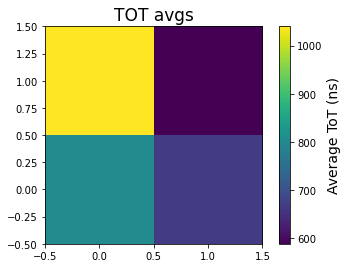

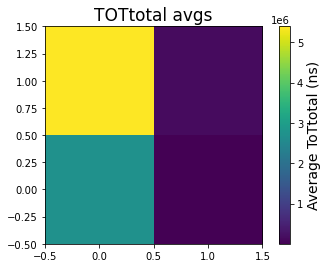

In [145]:
# reshape and plot data
# plt.figure(figsize = (8,8))
TOTavgs = [YToTavg, GRIDToTavg, _0thToTavg, XToTavg]
plt.imshow(np.array(TOTavgs).reshape(2,2), origin='lower')
plt.colorbar().set_label('Average ToT (ns)', fontsize=14)
plt.title('TOT avgs', fontsize=17)
plt.show()

TOTToTalavgs = [YToTtotalavg, GRIDToTtotalavg, _0thToTtotalavg, XToTtotalavg]
plt.imshow(np.array(TOTToTalavgs).reshape(2,2), origin='lower')
plt.colorbar().set_label('Average ToTtotal (ns)', fontsize=14)
plt.title('TOTtotal avgs', fontsize=17)
plt.show()
# plt.savefig('ClusterSizeAvgs8x8_10s_1012020_114131-1_cent.png',  bbox_inches='tight')

In [2]:
# 500nsGW 2usPW
othToTs = { 0: 7818.017043981534, 1: 7812.817338049323, 2: 7813.457698630885,\
          3: 7800.660443755592, 4: 7822.883914031067, 5: 7984.29917164912,\
          6: 7954.502990169038, 7: 7962.057489359335, 8: 7947.966542055465,\
          9: 7865.307642638513, 10: 7810.38993341594}
XToTs = {0: 231.4966928939452, 1: 249.23745469514182, 2: 247.692797107009,\
         3: 1181.2685251963846, 4: 839.9738016093481, 5: 265.755109534388,\
         6: 307.3953350639384, 7: 266.77185279687967, 8: 198.5913364943073,\
         9: 223.2609080271381, 10: 226.09263971236308}
YToTs = {0: 1055.5515720320027, 1: 1065.5486419081776, 2: 1053.5986082088693,\
          3: 1054.6784643870958, 4: 1007.7523396714134, 5: 998.1206892334784,\
          6: 2658.7875193478785, 7: 2985.3418301278575, 8: 2320.3783372418693,\
          9: 1087.909145369918, 10: 1011.4785903350455}

'Tue Jan 12 22:52:42 2021'

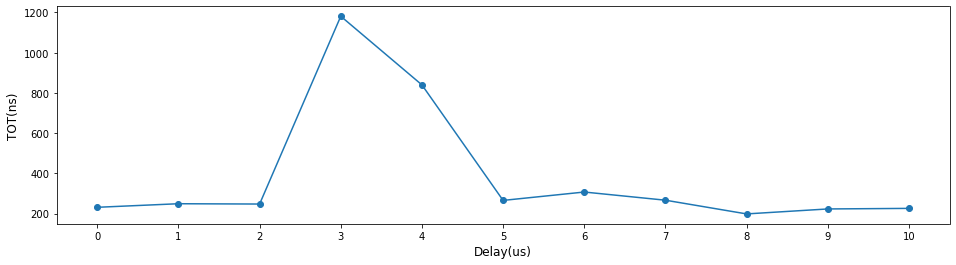

In [14]:
plt.rcParams["figure.figsize"] = (16,4)
plt.plot(XToTs.keys(),XToTs.values(), 'o-')
#plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('Delay(us)',fontsize = 12)
plt.ylabel('TOT(ns)',fontsize = 12)
plt.xticks(range(11))
# for i in range(100):
#     plt.axvline(x=(TrigTime[i]), ymin=0, ymax=2500, color='k')
# plt.axvline(x=(globals()["grid1_3.5e9_3.55e9_max_df"]['#ToA'].max()/4096.*25.), ymin=0, ymax=2500, color='k')
# plt.xlim(963691753.125-50, 963691753.125+250)
# plt.xlim(3.25e9, 3.6e9)
# plt.xlim(grid1_df['#ToA'].min()/4096.*25., grid1_df['#ToA'].max()/4096.*25.)
# plt.savefig('TOTvsTOA_3.25e9_3.5e9_8212020_025447-1.png', bbox_inches='tight', facecolor='w')
time.ctime()
# print("Period of Oscillation:", ((globals()["grid1_3.5e9_3.55e9_max_df"]['#ToA'].max()/4096.*25.)-(globals()["grid1_3.35e9_3.40e9_max_df"]['#ToA'].max()/4096.*25.)), "(ns)")oth_df = min_max(data1, 0, 76, 180, 256)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

'Tue Jan 12 22:53:38 2021'

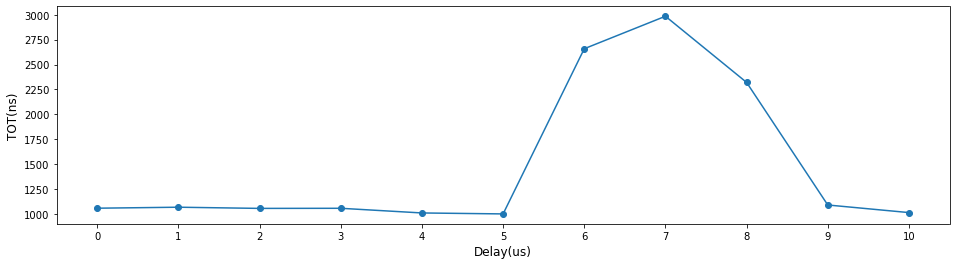

In [15]:
plt.rcParams["figure.figsize"] = (16,4)
plt.plot(YToTs.keys(),YToTs.values(), 'o-')
#plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('Delay(us)',fontsize = 12)
plt.ylabel('TOT(ns)',fontsize = 12)
plt.xticks(range(11))
# for i in range(100):
#     plt.axvline(x=(TrigTime[i]), ymin=0, ymax=2500, color='k')
# plt.axvline(x=(globals()["grid1_3.5e9_3.55e9_max_df"]['#ToA'].max()/4096.*25.), ymin=0, ymax=2500, color='k')
# plt.xlim(963691753.125-50, 963691753.125+250)
# plt.xlim(3.25e9, 3.6e9)
# plt.xlim(grid1_df['#ToA'].min()/4096.*25., grid1_df['#ToA'].max()/4096.*25.)
# plt.savefig('TOTvsTOA_3.25e9_3.5e9_8212020_025447-1.png', bbox_inches='tight', facecolor='w')
time.ctime()
# print("Period of Oscillation:", ((globals()["grid1_3.5e9_3.55e9_max_df"]['#ToA'].max()/4096.*25.)-(globals()["grid1_3.35e9_3.40e9_max_df"]['#ToA'].max()/4096.*25.)), "(ns)")oth_df = min_max(data1, 0, 76, 180, 256)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

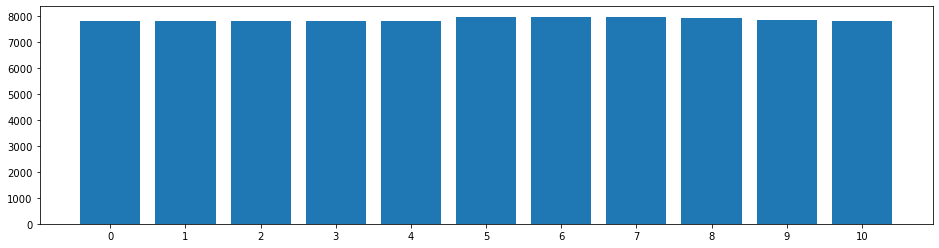

In [6]:
plt.bar(range(len(othToTs)), list(othToTs.values()), align='center')
plt.xticks(range(len(othToTs)), list(othToTs.keys()))
plt.show()